# Тема 09. Состязательные атаки на нейронные сети классификации изображений.

## Введение

Нейронные сети прекрасны! 

Решают множество задач лучше человека. Распознают и создают картинки, пишут музыку и стихи, даже играют в игры. Казалось бы все, создан полноценный искусственный интеллект, как в фильмах, который может полностью заменить человека.

Но нет. Нейронные сети "думают" не так, как человек. И в некоторых ситуациях, когда человек легко находит решение, нейронная сеть, какая бы сильная она ни была, ошибается.

Нейронную сеть очень просто обмануть!

Посмотрите на картинку. Левое изображение нейронная сеть распознает отлично, это панда. Но стоит добавить малюсенькое искажение (среднее изображение), которое вы даже не заметите (правое изображение), и нейронная сеть уверенно распознает на этом изображении гиббона. Чудеса. 

![img](https://drive.google.com/uc?id=1kApf25Vn7UQDSyFhQsZl39acEBVzJt-u)



Но если вы сами возьмете картинку, добавите к ней маленький случайный шум, то нейронная сеть распознает ее без ошибок. Дело в том, что добавленный выше шум **не случайный**.

Как "думает" нейронная сеть? Возьму пиксели, умножу их на веса, сложу, пропущу через функцию активации, сделаю так много раз, сколько слоев в сети, получу выход. А что будет, если мы возьмем один пиксель и будем бесконечно увеличивать его значение (вес не нулевой)? Остальные пиксели потеряются на его фоне, от него будет получаться очень большое слагаемое, а другие пиксели дадут маленькие значения. И только этот пиксель будет определять выход сети. 

В реальности мы не можем изменять пиксель бесконечно, так **давайте изменять все пиксели на небольшую величину, но так, чтобы суммарные изменения были большими!** 

Мы даже можем посчитать, насколько изменить пиксель, чтобы это изменение как можно больше искажало выход. Как посчитать? Да очень просто - найти градиент функции ошибки по этому пикселю. В обучении сети, когда изменяли веса, мы минимизировали функцию ошибки, а теперь будем максимизировать ее изменяя вход. 

Такие действия, когда мы хотим обмануть нейронную сеть, назвали **состязательные атаки** (Adversarial attack). Возможность атаки на нейронную сеть это очень серьезно. Представьте, едет автомобиль, который распознает дорожные знаки, а террорист наклеил на знак маленькую наклейку, и нейронная сеть автомобиля ошибается при распознавании знака - авария. 

Сегодня существует много типов атак на нейронные сети, любые сети страдают этим, какие-то больше, какие-то меньше. Например, атаки на системы распознавания изображений, когда мы изменяя немного вход, заставляем распознавать другой, фальшивый, класс.

Атаки могут быть *направленные*, когда мы хотим добиться какого-то конкретного класса при распознавании. Немножко поменяете изображение своего лица и нейронная сеть примет вас за владельца банка и разрешит снять миллионы долларов.

Атаки могут быть и *ненаправленные*, когда нам все равно, какой класс получится при распознавании, лишь бы не настоящий.

# НЕЛЬЗЯ ПОЛНОСТЬЮ ДОВЕРЯТЬ НЕЙРОННЫМ СЕТЯМ
и другим методам. Всегда надо проверять и перепроверять решения нейронной сети. За все должен отвечать человек.


# Метод быстрого знака градиента

Простой метод для реализации атаки на нейронную сеть - метод быстрого знака градиента (Fast Gradient Sign Method, FGSM). Он очень прост:

* имеем обученную нейронную сеть (например, распознает изображения)
* возьмем изображение, для которого хотим провести атаку
* посчитаем градиент функции ошибки по всем пикселям изображения. Нам нужен только знак градиента.
* изменим пиксели так, чтобы максимизировать функцию ошибки. В отличии от градиентного спуска, где мы минимизировали ошибку, теперь будем максимизировать ее. Чтобы изменения были маленькими (незаметными) умножим прибавляемый градиент на малое число эпсилон. 
* если надо, повторим процедуру еще раз. Но надо не перестараться, чтобы общие изменения были маленькими. Это не всегда может получится. 



# Torch и CleverHans

Для примера давайте сделаем атаку на нейронную сеть, которая распознает рукописные цифры из MNIST. 
Для реализации нейронной сети воспользуемся библиотекой [torch](https://pytorch.org/), а реализацию метода FGSM возьмем из библиотеки [CleverHans](https://github.com/cleverhans-lab/cleverhans), она требует установить заранее и [TensorFlow](https://www.tensorflow.org/). Набор данных MNIST и функции для работы с ним возьмем из библиотеки [torchvision](https://pytorch.org/docs/stable/torchvision/index.html). Если еще не установлены, надо поставить. При первой установке могут возникать некритичные предупреждения и для скачивания набора данных может потребоваться время, иногда бывает, что сервис скачивания временно недоступен, тогда подождите немного и повторите. В Colab уже установлены все эти библиотеки, кроме cleverhans. 

Другую библиотеку для атак [advertorch](https://github.com/BorealisAI/advertorch) использовать сейчас не будем, но упомянем ее. Там реализованы другие типы атак. 

In [1]:
# установим библиотеку, именно эту версию, чтобы избежать проблем совместимости
!pip install git+https://github.com/cleverhans-lab/cleverhans.git

  Cloning https://github.com/cleverhans-lab/cleverhans.git to /tmp/pip-req-build-zikdsd1x
  Running command git clone -q https://github.com/cleverhans-lab/cleverhans.git /tmp/pip-req-build-zikdsd1x
     |████████████████████████████████| 163kB 8.4MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for cleverhans: filename=cleverhans-4.0.0-cp37-none-any.whl size=92415 sha256=fe5bab737b09fa426488dc46415c486978bc18fd7a982a41692037b8e7ffb7ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-vsvwt0p1/wheels/b3/bf/95/b96be44a39afa8756647df63ff1d6592fe799e7b2e03ef437c
Successfully built cleverhans


## Создание и обучение нейронной сети распознаванию рукописных цифр

In [2]:
# Импортируем torch
import numpy as np #
import torch # сам torch
from torch import nn # для нейронных сетей
import torch.nn.functional as F # функции ошибки
from torch import optim # оптимизатор
from torch.autograd import Variable # для автоматического дифференцирования
from torchvision import datasets, transforms # наборы данных и методы для них

In [3]:

# Импортируем cleverhans

# Метод FGSM
from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method


Сначала создадим и обучим простую сверточную нейронную сеть для распознавания цифр. Входы - тензоры размером (bath_size,1,28,28), т.е. серые изображения. Вы можете поменять структуру по своему усмотрению.

In [4]:
# Задаем нейронную сеть
class LeNet5(torch.nn.Module):          
     
    def __init__(self):     # инициализация
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5, padding=2) # сверточный слой
        self.conv2 = torch.nn.Conv2d(6, 16, 5) # сверточный слой
        self.fc1 = nn.Linear(16*5*5, 120)   # полносвязный слой
        self.fc2 = nn.Linear(120, 84)  # полносвязный слой     
        self.fc3 = nn.Linear(84, 10)   # полносвязный слой
        
    def forward(self, x): # расчет выходов
        x = F.relu(self.conv1(x)) # первого сверточного слоя, активация relu  
        x = F.max_pool2d(x, 2) #  макспулинг
        x = F.relu(self.conv2(x)) # второго сверточного слоя, активация relu 
        x = F.max_pool2d(x, 2) #  макспулинг
        x = x.view(-1, 16*5*5) #  "вытягиваем" в вектор
        x = F.relu(self.fc1(x))#  первый полносвязный слой, активация relu
        x = F.relu(self.fc2(x))#  второй полносвязный слой, активация relu
        x = self.fc3(x) #  третий полносвязный слой (без активации)
        
        return F.log_softmax(x,dim=-1) # активация log_softmax

Функция для обучения.

In [5]:

NB_EPOCHS = 4 # количество эпох обучения
BATCH_SIZE = 128 # размер пакета
LEARNING_RATE = .001 # шаг обучения

#Training the Network
def trainTorch(torch_model, # модель нейронной сети
               train_loader, # данные для обучения
               test_loader, # данные для теста, не делаем здесь
               nb_epochs=NB_EPOCHS, # количество эпох обучения
               batch_size=BATCH_SIZE, # размер пакета
               train_end=-1,
               test_end=-1,
               learning_rate=LEARNING_RATE, # шаг обучения
               optimizer=None): # метод обучения

    train_loss = [] # для функции ошибки
    total = 0 # число примеров
    correct = 0 # число правильно распознанных примеров
    step = 0 # число шагов обучения
    for _epoch in range(nb_epochs): # цикл по эпохам
        # Обучение
        for xs, ys in train_loader: # цикл по данным (батчам)
            xs, ys = Variable(xs), Variable(ys) # данные переводим в Variable для корректной работы
            if torch.cuda.is_available(): # а если есть граф.ускоритель, то переводим в массив на нем
                xs, ys = xs.cuda(), ys.cuda()
            optimizer.zero_grad() # обнуляем градиент с прошлых шагов
            preds = torch_model(xs) # считаем выход сети (предсказанные классы)
            # 
            loss = F.nll_loss(preds, ys) # считаем ошибку
            # 
            loss.backward()  # запускаем автодифференцирование для вычисления градиента
            train_loss.append(loss.data.item()) # добавляем в историю
            optimizer.step()  # обновляем веса

            preds_np = preds.cpu().detach().numpy() # переводим выход в numpy массив
            # считаем сколько правильно  распознано (выбираем класс по максимальному элементу)
            correct += (np.argmax(preds_np, axis=1) == ys.cpu().detach().numpy()).sum()
            total += train_loader.batch_size # всего примеров
            step += 1 # счетчик шагов
            if total % 1000 == 0: # каждые 1000 примеров 
                acc = float(correct) / total # считаем точность
                print('[%s] Training accuracy: %.2f%%' % (step, acc * 100))
                total = 0
                correct = 0
                # точность будет считаться для каждой 1000 примеров 

Загрузим данные для обучения и теста.

In [ ]:
DS_train=datasets.MNIST('data', train=True, download=True,
                    transform=transforms.ToTensor());
DS_test=datasets.MNIST('data', train=False, download=True,
                    transform=transforms.ToTensor());                    


Если сервис по каким-то причинам не работает, то используем другой адрес, скачиваем данные, распаковываем:

In [23]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
DS_train=datasets.MNIST('./', train=True, download=False,
                    transform=transforms.ToTensor());
DS_test=datasets.MNIST('./', train=False, download=False,
                    transform=transforms.ToTensor()); 

--2021-03-24 16:29:53--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-24 16:29:54--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.1’

MNIST.tar.gz.1          [             <=>    ]  33.20M  11.1MB/s    in 3.0s    

2021-03-24 16:29:57 (11.1 MB/s) - ‘MNIST.tar.gz.1’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

In [21]:
# модель и данные для обучения
model1 = LeNet5() # создаем модель нейронной сети
if torch.cuda.is_available():
    model1 = model1.cuda() # если есть граф.ускоритиель, то  на нем
nb_epochs = 8 # число эпох обучения
batch_size = 128 # размер батча
learning_rate = 0.001 # шаг обучения
train_end = -1
test_end = -1

# обучающие данные, загрузчик будет читать их с диска
train_loader = torch.utils.data.DataLoader(
    DS_train, batch_size=batch_size, shuffle=True)
# тестовые данные, загрузчик будет читать их с диска
test_loader = torch.utils.data.DataLoader(
    DS_test, batch_size=batch_size)

In [22]:
#обучаем модель
print("Training Model")
# задаем метод обучения
optimizer = optim.Adam(model1.parameters(), lr=learning_rate)
# обучаем
trainTorch(model1, train_loader, test_loader, nb_epochs, batch_size, train_end, test_end, learning_rate, optimizer = optimizer)

Training Model
[125] Training accuracy: 71.88%
[250] Training accuracy: 91.16%
[375] Training accuracy: 94.18%
[500] Training accuracy: 95.04%
[625] Training accuracy: 96.36%
[750] Training accuracy: 96.91%
[875] Training accuracy: 96.74%
[1000] Training accuracy: 97.34%
[1125] Training accuracy: 97.47%
[1250] Training accuracy: 97.70%
[1375] Training accuracy: 97.87%
[1500] Training accuracy: 97.80%
[1625] Training accuracy: 98.27%
[1750] Training accuracy: 98.31%
[1875] Training accuracy: 98.31%
[2000] Training accuracy: 98.37%
[2125] Training accuracy: 98.60%
[2250] Training accuracy: 98.44%
[2375] Training accuracy: 98.49%
[2500] Training accuracy: 98.86%
[2625] Training accuracy: 98.65%
[2750] Training accuracy: 98.86%
[2875] Training accuracy: 98.75%
[3000] Training accuracy: 98.84%
[3125] Training accuracy: 99.06%
[3250] Training accuracy: 98.89%
[3375] Training accuracy: 98.78%
[3500] Training accuracy: 99.08%
[3625] Training accuracy: 99.03%
[3750] Training accuracy: 99.06%


Как мы видим, точность высока, сеть обучена отлично. 

## Атака на нейронную сеть

Для рисования сделаем функцию. Обратим внимание, что в torch тензор имеет размерность (...1,28,28), а для рисования надо (28,28). Будем извлекать только последние две размерности.

In [24]:
# функция для рисования
%matplotlib inline
from matplotlib import pyplot as plt
def show(img_clean,img_adw,y,pred,pred_adw):
    # принимает:
    # исходное изображение,
    # атакующее изображение
    # истинный класс исходного изображения
    # посчитанный класс исходного изображения
    # посчитанный класс атакующего изображения
    
    # Исходное изображение
    plt.subplot(121)
    # рисуем в градациях серого, извлекая последние две размерности
    plt.imshow(img_clean[0,:,:],cmap='gray')
    title=[y, pred] # в заголовке истинный класс и посчитанный класс
    plt.title(title)
    
    # Атакуещее изображение
    plt.subplot(122)
    # рисуем в градациях серого, извлекая последние две  размерности
    plt.imshow(img_adw[0,:,:], cmap='gray')
    title=[y, pred_adw] # в заголовке истинный класс и посчитанный класс
    plt.title(title)

Теперь сделаем атаку:
* ограничимся несколькими батчами, будем рисовать только одно изображение из батча
* укажем targeted направленная или не направленная атака. Для направленной нужно сделать цели goal - номер класса который мы хотели бы получать.
* зададим параметры метода, число шагов NUM_STEPS атаки и ее "силу" эпсилон EPSILON.



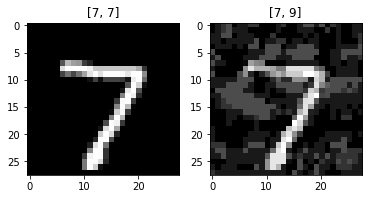

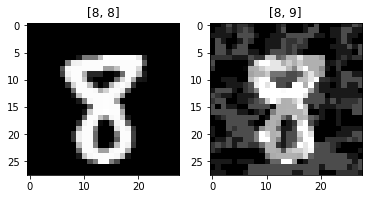

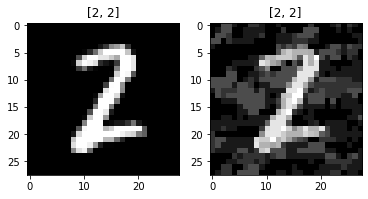

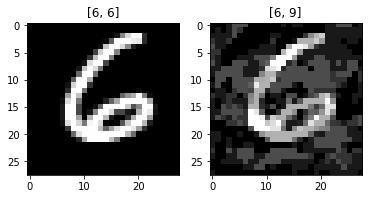

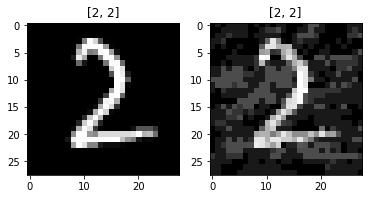

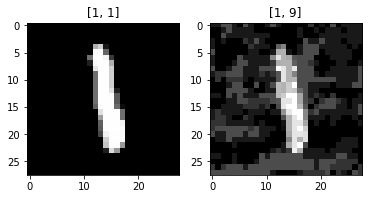

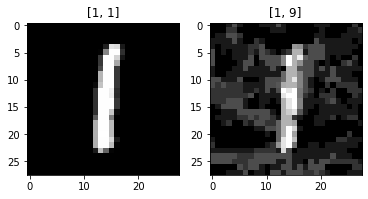

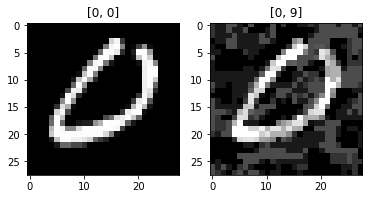

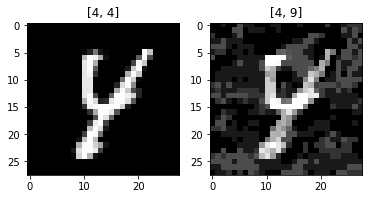

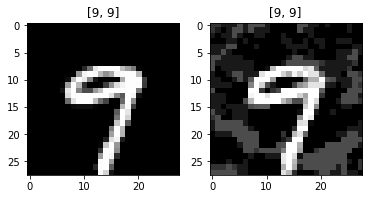

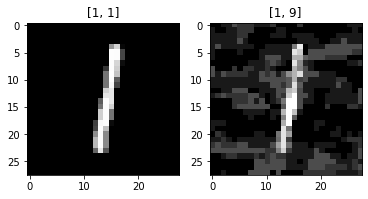

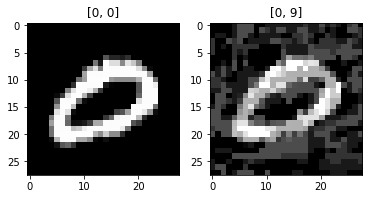

In [28]:

NUM_STEPS=3 # число шагов атаки
EPSILON=0.1# "сила" атаки
#targeted=False # ненаправленная
targeted=True # направленная
goal=9 # цель (класс) атаки

# цель одинаковая для всех данных в батче
target=goal*np.ones(shape=[BATCH_SIZE]).astype('long')
target=torch.tensor(target,dtype=torch.long) # переводим в тензор torch
#
for i,(xs,ys) in enumerate(test_loader): # цикл по атакуемым данным
    #print(i)
    #with torch.no_grad():
    model1.eval() # рассчитываем модель
    #
    xs, ys = Variable(xs), Variable(ys) # перводим данные в Variable для совместимости
    if torch.cuda.is_available(): #
        xs, ys = xs.cuda(), ys.cuda() # на граф. ускоритель, если есть
    preds1 = model1(xs) # считаем выход для исходного изображения
    preds_np1 = preds1.cpu().detach().numpy() # переводим в numpy
    finalPred = np.argmax(preds_np1, axis=1) # выбирем предсказанный класс по максимальному элементу
    
    # Атакующее изображение
    xs_adw=xs # берем исходное изображение
    for j in range(0,NUM_STEPS): # и несколько раз подряд изменяем его
        #
        if targeted: # для направленной атаки 
            xs_adw = fast_gradient_method(model1, # модель атакуемой нейроной сети
                                      xs_adw, # исходное изображение
                                      eps=EPSILON, # сила атаки
                                      norm=np.inf, # параметр метода, не изменяем
                                      clip_min=0., # обрезка значений снизу
                                      clip_max=1., # обрезка значений сверху
                                      targeted=True, # направленная атака
                                      y=target # цель атаки
                                     )
        else: # для ненаправленной атаки
             xs_adw = fast_gradient_method(model1,
                                      xs_adw,
                                      eps=EPSILON,
                                      norm=np.inf,
                                      clip_min=0.,
                                      clip_max=1.,
                                      targeted=False,# ненаправленная атака
                                      )
            
    
    # Теперь в xs_adw атакующее изображение
    xs_adw = Variable(xs_adw) #  перводим данные в Variable для совместимости
    if torch.cuda.is_available(): #
        xs_adw = xs_adw.cuda() #
    preds1_adw = model1(xs_adw) # рассчитываем выход
    preds_np1_adw = preds1_adw.cpu().detach().numpy() # 
    finalPred_adw = np.argmax(preds_np1_adw, axis=1) # выбираем класс по максимальному элементу
    
    #
    bn=0; # номер изображения из батча, которое рисуем 
    # рисуем
    show(xs.numpy()[bn],xs_adw.numpy()[bn],ys.numpy()[bn],finalPred[bn],finalPred_adw[bn])
    plt.show()
    # прерываем после 10 батчей, чтобы не загромождать
    if i>10:
        break

# Задания
Изменяйте параметры и смотрите как это влияет на заметность атаки и ее успешность. Попробуйте подобрать такие NUM_STEPS и EPSILON, для которых вы правильно распознаете изображение, а нейронная сеть - нет.

Меняйте цели в направленной атаке, попробуйте разные цели и параметры. Какие-то изображения проще атаковать, а какие-то сложнее. Приведите примеры изображений, для которых атака прошла, и для которых атака не получилась. Поиграть с другими атакаими и наборами данных можно [здесь](https://www.pluribus-one.it/research/sec-ml/demo).

# Заключение
Сегодня существует множество способов атак, для простых и сложных сетей. Есть атаки физические, когда модификация входов происходит не в компьютере, а на реальных объектах (например на лицо приклеивается специальный стикер и вас невозможно распознать). Есть атаки *однопиксельные*, когда мы меняем только один пиксель в изображении  и этого хватает, чтобы обмануть слабую нейронную сеть.

Но можно ли защититься от атаки? Можно. Для этого придумали множество способов, например, такой: самим сделать атакующие примеры, а затем (до)обучить сеть на этих атакующих примерах. Это поможет от тех атак, на которых вы обучались. Но не гарантирует что другие атаки не сработают. Это вечная борьба атакующих и защитников.

Не думайте, что мы учим вас плохому, атаки бывают и полезны. Только понимая принцип атак можно научиться бороться с ними или использовать их для блага. На самом деле, из принципа атаки появились очень интересные виды нейронных сетей, генеративно-состязательные сети, с которыми мы познакомимся в другой раз. 

## Ссылки

Использованы и адаптированы материалы:

https://towardsdatascience.com/adversarial-attack-and-defense-on-neural-networks-in-pytorch-82b5bcd9171 

https://github.com/cleverhans-lab/cleverhans/blob/master/tutorials/torch/mnist_tutorial.py






